In [49]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD


The data is cleaned and ready for the training phase. There are many methods used in classification tasks. I'll test some of the most common algorithms and compare the results.  
For performance evaluation I'll use the confusion matrix and the well-known Precision, Recall and F1-score.

In [2]:
data = pd.read_csv('./../../data/processed/fake_or_real_news.csv')

In [3]:
data['label'].value_counts()

REAL    3154
FAKE    3152
Name: label, dtype: int64

This doesn't happen very often, but the dataset is almost perfectly balanced. Since it is relatively small, I'll set the training set size to be of 30% of the whole dataset.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.3, stratify = data['label'])

Now I have to extract numerical features from the dataset of string tokens. One way to do this is using **TF-IDF** term weighting scheme which is a technique of calculating the importance of a word in a given corpus.
<br/><br/>

<center>tf-idf(w,d,D) = tf(w,d) * idf(w,D)</center>
<br/>
<center>tf(w,d) = log(1 + f(w,d))</center>
<br/>
<center>idf(w,D) = log($\frac{N}{f(w,D)}$)</center>
<br/>
where:

- w - a given word from an article  
- d - a given article from the dataset
- D - the whole collection of articles
- N - the total number of articles in the dataset  
- f(w,d) - the frequency of word w in article d
- f(w,D) - the frequency of word w in all articles

**TF** (term frequency) increases the weight of the terms (words) that occur more frequently in the document.  
<br/>
**IDF** (inverse document frequency) diminishes the weight of the terms that occur in all the documents of corpus and, at the same time, increases the weight of the terms that occur in rare documents across the corpus.  
<br/>
What **TF-IDF** does is that it tries to offer more weight to words that have a high number of occurences in some documents, but penalizes the words that appear frequently in very many documents. Words can be relevant if they appear frequently in rare situations. If a word is very common accross too many documents, their importance decreases, because they do not bring much information (similar to what stop words offer)

In [5]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

Multinomial Naive Bayes classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.9696    0.7072    0.8178       946
        REAL     0.7696    0.9778    0.8613       946

    accuracy                         0.8425      1892
   macro avg     0.8696    0.8425    0.8396      1892
weighted avg     0.8696    0.8425    0.8396      1892

Confusion matrix


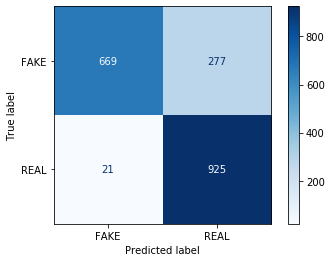

In [6]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_vect, y_train)
mnb_pred = mnb_clf.predict(X_test_vect)
mnb_cr = classification_report(y_test, mnb_pred, digits = 4)

print("Multinomial Naive Bayes classifier evaluation report (Precision, Recall, F1)\n")
print(mnb_cr)

mnb_cm = confusion_matrix(y_test, mnb_pred)
print("Confusion matrix")
plot_confusion_matrix(mnb_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

The **Multinomial Naive Bayes** classifer appears to have difficulties with false negatives (fake news labeled as real news). Naive Bayes is known to perform better on snipets of text. This is why for full-length texts it's better to use other algorithms (for example SVMs).

Random forest classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.9049    0.9049    0.9049       946
        REAL     0.9049    0.9049    0.9049       946

    accuracy                         0.9049      1892
   macro avg     0.9049    0.9049    0.9049      1892
weighted avg     0.9049    0.9049    0.9049      1892

Confusion matrix


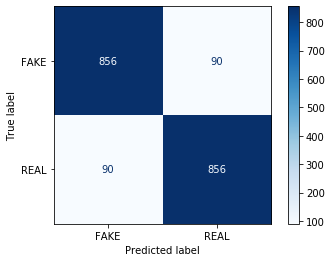

In [7]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vect, y_train)
rf_pred = rf_clf.predict(X_test_vect)
rf_cr = classification_report(y_test, rf_pred, digits = 4)

print("Random forest classifier evaluation report (Precision, Recall, F1)\n")
print(rf_cr)

rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion matrix")
plot_confusion_matrix(rf_clf, X_test_vect, y_test, cmap='Blues', values_format='d')
plt.show()

Results show us that **Random Forest** classifier achieves much better results than MNB. the number of false negatives and false positives are balanced. Random Forest is usually suitable for high dimensional data which makes it a good candidate for fake news detection.

Logistic regression evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.8832    0.9355    0.9086       946
        REAL     0.9315    0.8763    0.9031       946

    accuracy                         0.9059      1892
   macro avg     0.9073    0.9059    0.9058      1892
weighted avg     0.9073    0.9059    0.9058      1892

Confusion matrix


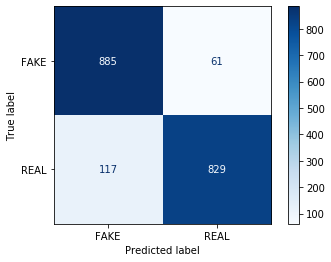

In [8]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_vect,y_train)
lr_pred = lr_clf.predict(X_test_vect)
lr_cr = classification_report(y_test, lr_pred, digits = 4)

print("Logistic regression evaluation report (Precision, Recall, F1)\n")
print(lr_cr)

lr_cm = confusion_matrix(y_test, lr_pred)
print("Confusion matrix")
plot_confusion_matrix(lr_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

**Logistic regression** achieves slightly better results than Random Forest. Because it's fast to train and can offer good results in text classification, Logistic regression proves to be a good solution.

Support vector classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.9138    0.9419    0.9276       946
        REAL     0.9400    0.9112    0.9254       946

    accuracy                         0.9265      1892
   macro avg     0.9269    0.9265    0.9265      1892
weighted avg     0.9269    0.9265    0.9265      1892

Confusion matrix


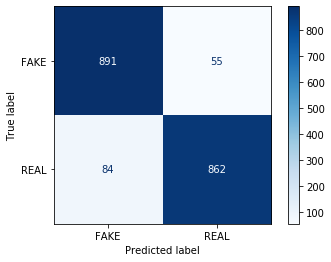

In [9]:
svm_clf = SVC(C=10, kernel='rbf')
svm_clf.fit(X_train_vect, y_train)
svm_pred = svm_clf.predict(X_test_vect)
svm_cr = classification_report(y_test, svm_pred, digits = 4)

print("Support vector classifier evaluation report (Precision, Recall, F1)\n")
print(svm_cr)

svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion matrix")
plot_confusion_matrix(svm_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

Having in mind the experiments done on the previous dataset, I expected SVC to obtain the best result. SVC is known to obtain good results in text classification tasks. Because I'm not sure if C=10 and kernel = 'rbf' are the best parameters, I'm going to do hyperparameter tuning using grid search in order to find our if there are any better values for C, gamma and kernel hyperparameters.

In [18]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_vect,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  28.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  28.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  28.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  28.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  28.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  29.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  29.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=  30.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  29.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=  28.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total= 1.0min
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total= 1.1min
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total= 1.1min
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  37.9s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  27.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  27.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  27.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=  30.8s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=  31.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=  30.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=  31.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=  30.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  26.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  26.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=  30.8s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  30.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=  23.3s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=  23.7s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=  23.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=  23.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=  23.4s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 121.3min finished


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Support vector classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.9295    0.9334    0.9314       946
        REAL     0.9331    0.9292    0.9311       946

    accuracy                         0.9313      1892
   macro avg     0.9313    0.9313    0.9313      1892
weighted avg     0.9313    0.9313    0.9313      1892

Confusion matrix


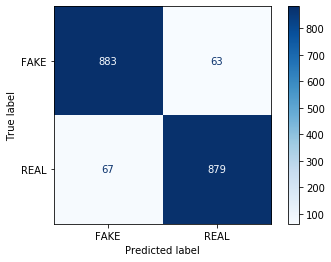

In [22]:
grid_predictions = grid.predict(X_test_vect)
svm_grid_cr = classification_report(y_test, grid_predictions, digits = 4)

print("Support vector classifier evaluation report (Precision, Recall, F1)\n")
print(svm_grid_cr)

print("Confusion matrix")
plot_confusion_matrix(grid, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

Hyperparamenter tuning helped a bit. **Support vector classifier** with radial basis function as kernel, C = 100 and gamma = 0.1 achieves an F1 score of ~93.1%. The number of false positives and false negatives are balanced (67 and 63 respectively)

Next, I wanted to train a multi layer perceptron neural net that gets as input the TF-IDF representation of words. At first I tried to train a network with a few dense layers (3-4) and even if a obtained (after only 10 epochs) a nearly perfect training accuracy (close to 100%), the testing accuracy was somewhere around 90%. It was clear that the network was overfitting. Therefore, I included l2 kernel regularization (to penalize the weights in the first 3 layers) and several dropout layers in order to reduce overfitting. I also had to increase the number of epochs, in order to avoid underfitting.  

In [98]:
def build_model():
    model = Sequential()   
    model.add(Dense(512, input_dim=X_train_vect.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    
    return model

estimator = KerasClassifier(build_fn=build_model, epochs=15, batch_size=128, validation_split=0.2)
history = estimator.fit(X_train_vect, y_train)

Train on 3531 samples, validate on 883 samples
Epoch 1/15
3531/3531 [==============================] - 23s 7ms/step - loss: 2.1971 - accuracy: 0.6936 - val_loss: 0.9407 - val_accuracy: 0.9117
Epoch 2/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.7803 - accuracy: 0.8944 - val_loss: 0.6217 - val_accuracy: 0.9026
Epoch 3/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.5177 - accuracy: 0.9275 - val_loss: 0.4880 - val_accuracy: 0.9309
Epoch 4/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.4309 - accuracy: 0.9402 - val_loss: 0.4989 - val_accuracy: 0.9105
Epoch 5/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.3604 - accuracy: 0.9587 - val_loss: 0.4278 - val_accuracy: 0.9207
Epoch 6/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.3273 - accuracy: 0.9632 - val_loss: 0.4312 - val_accuracy: 0.9139
Epoch 7/15
3531/3531 [==============================] - 20s 6ms/step - loss: 0.3336

Neural network evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

        FAKE     0.9033    0.9376    0.9201       946
        REAL     0.9352    0.8996    0.9170       946

    accuracy                         0.9186      1892
   macro avg     0.9192    0.9186    0.9186      1892
weighted avg     0.9192    0.9186    0.9186      1892



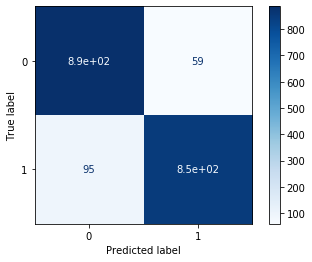

In [99]:
nn_pred = estimator.predict(X_test_vect)
nn_cr = classification_report(y_test, nn_pred, digits = 4)
print("Neural network evaluation report (Precision, Recall, F1)\n")
print(nn_cr)

nn_cm = confusion_matrix(y_test, nn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = nn_cm, display_labels = [0,1])
disp = disp.plot(cmap = "Blues")
plt.show()

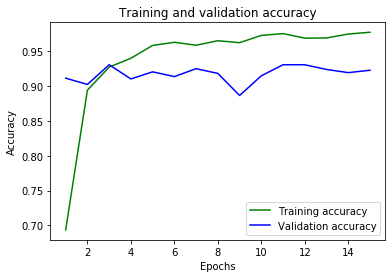

In [101]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

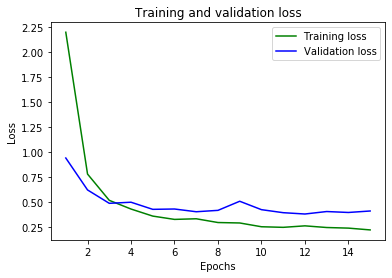

In [103]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Although the variance has been reduced (compared to the first experiments I've done that did not use regularization techniques), variance still remains a problem. Probably, an appropriate solution would be to add more data to the training set.  
One other idea that is worth trying is to use ensembling methods that would imply training different models and average their predictions.

To sum up, we've seen how algorithms like Multinomial Naive Bayes, Random Forest, Logistic Regression or Linear Suport Vector classifier perform in a fake news detection task. They have all achieved good results, SVC being the most performant (especially after doing hyperparameter tuning).  
At the same time we've seen that an artificial neural network can achieve good results, but it probably needs much more data to outperform SVC.